# Importing Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'D:\Data Set\Bengaluru_House_Data.csv')


In [4]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# Read the data 

In [7]:
dc=pd.read_csv(r'D:\Data Set\Bengaluru_House_Data.csv')


In [8]:
for i in data.columns:
    a=data[i].unique()
    print(f"{i}:  {a} \n\n")
  
    


area_type:  ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] 


availability:  ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul'] 


location:  ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur

In [9]:
data.shape

(13320, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [11]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<Axes: >

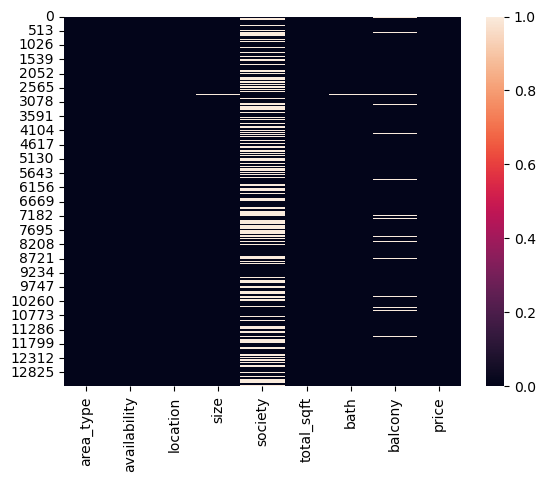

In [12]:
plt.plot(figsize=(10,10))
sns.heatmap(data.isnull())

# Imputing Cat Var

In [14]:
c_columns=data.select_dtypes(include='object')
c_columns.keys()

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [15]:
percent=c_columns.isnull().sum() / c_columns.shape[0] * 100
percent

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
dtype: float64

In [16]:
data['society'].fillna(data['society'].mode()[0],inplace=True)

In [17]:
data.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2  GrrvaGr       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4  GrrvaGr       1200   2.0      1.0   51.00

# Impute  Numerical val

In [22]:
n_columns=data.select_dtypes(include=('int','float'))
n_columns.keys()

Index(['bath', 'balcony', 'price'], dtype='object')

In [23]:
n_columns.isnull().sum()/n_columns.shape[0]*100

bath       0.548048
balcony    4.572072
price      0.000000
dtype: float64

# Drop rows as less data is missing

In [24]:
data=data.dropna()

<Axes: >

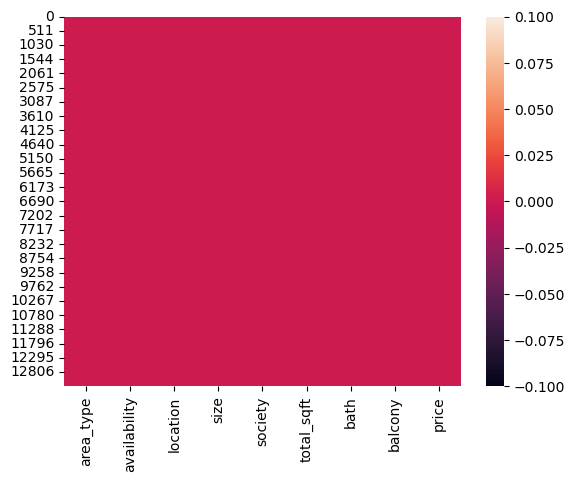

In [25]:
plt.plot(figsize=(10,10))
sns.heatmap(data.isnull())

In [26]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [27]:
data=data.drop(columns='availability')


# Feature Engineering

In [28]:
data.head()

area_type                  location       size  society  \
0  Super built-up  Area  Electronic City Phase II      2 BHK  Coomee    
1            Plot  Area          Chikka Tirupathi  4 Bedroom  Theanmp   
2        Built-up  Area               Uttarahalli      3 BHK  GrrvaGr   
3  Super built-up  Area        Lingadheeranahalli      3 BHK  Soiewre   
4  Super built-up  Area                  Kothanur      2 BHK  GrrvaGr   

  total_sqft  bath  balcony   price  
0       1056   2.0      1.0   39.07  
1       2600   5.0      3.0  120.00  
2       1440   2.0      3.0   62.00  
3       1521   3.0      1.0   95.00  
4       1200   2.0      1.0   51.00

In [29]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [31]:
label={'Super built-up  Area':2 , 'Plot  Area':1, 'Built-up  Area':3,
       'Carpet  Area':4}

In [32]:
data['Area Type']=data['area_type'].map(label)

In [33]:
data=data.drop(columns='area_type')

In [34]:
data['location'].value_counts()

location
Whitefield                                            514
Sarjapur  Road                                        372
Electronic City                                       300
Kanakpura Road                                        261
Thanisandra                                           231
Yelahanka                                             206
Uttarahalli                                           186
Hebbal                                                173
Raja Rajeshwari Nagar                                 168
Marathahalli                                          164
7th Phase JP Nagar                                    147
Bannerghatta Road                                     144
Hennur Road                                           142
Haralur Road                                          135
Electronic City Phase II                              130
Rajaji Nagar                                           99
Chandapura                                             98
Bella

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
LE=LabelEncoder()

In [37]:
data['Location']=LE.fit_transform(data['location'])
data['Society']=LE.fit_transform(data['society'])
data['Size']=LE.fit_transform(data['size'])

In [38]:
d=['location','size','society']
data.drop(columns=d,inplace=True)
data.head()

total_sqft  bath  balcony   price  Area Type  Location  Society  Size
0       1056   2.0      1.0   39.07          2       407      443     9
1       2600   5.0      3.0  120.00          1       306     2353    15
2       1440   2.0      3.0   62.00          3      1141      777    12
3       1521   3.0      1.0   95.00          2       738     2109    12
4       1200   2.0      1.0   51.00          2       697      777     9

In [40]:
#to check catagorical value in numeric value
c_var=data.select_dtypes(include=('object'))
c_var.keys()


Index(['total_sqft'], dtype='object')

In [41]:
#accessing string val
string_val = data[~data['total_sqft'].str.isnumeric()]

# Replace rows containing string values with NaN
data.loc[string_val.index, 'total_sqft'] = np.nan

print(data)



      total_sqft  bath  balcony     price  Area Type  Location  Society  Size
0           1056   2.0      1.0    39.070          2       407      443     9
1           2600   5.0      3.0   120.000          1       306     2353    15
2           1440   2.0      3.0    62.000          3      1141      777    12
3           1521   3.0      1.0    95.000          2       738     2109    12
4           1200   2.0      1.0    51.000          2       697      777     9
5           1170   2.0      1.0    38.000          2      1213      585     9
8           1310   3.0      1.0    63.250          2       778      777    12
10          1800   2.0      2.0    70.000          2      1213      777    12
11          2785   5.0      3.0   295.000          1      1213     1566    15
12          1000   2.0      1.0    38.000          2        69     2015     9
13          1100   2.0      2.0    40.000          3       454      777     9
14          2250   3.0      2.0   148.000          1      1005  

In [42]:
data=data.dropna()


In [43]:
#changing the datatype of a column
data['total_sqft'] = data['total_sqft'].astype(int)


# Plotting the correaltions

In [44]:
data.describe()

total_sqft          bath       balcony         price     Area Type  \
count  12438.000000  12438.000000  12438.000000  12438.000000  12438.000000   
mean    1509.329635      2.613925      1.604277    105.879403      2.048400   
std     1165.372867      1.220291      0.804039    132.271685      0.590241   
min        5.000000      1.000000      0.000000      8.000000      1.000000   
25%     1100.000000      2.000000      1.000000     49.342500      2.000000   
50%     1260.000000      2.000000      2.000000     70.000000      2.000000   
75%     1636.000000      3.000000      2.000000    114.000000      2.000000   
max    52272.000000     40.000000      3.000000   2912.000000      4.000000   

           Location       Society          Size  
count  12438.000000  12438.000000  12438.000000  
mean     653.149059   1085.595514     10.871603  
std      353.883594    602.201974      3.696602  
min        0.000000      0.000000      0.000000  
25%      387.000000    777.000000      9.000000  
50%      637.000000    777.000000     12.000000  
75%      970.000000   1523.000000     12.000000  
max     1264.000000   2591.000000     26.000000

<Axes: >

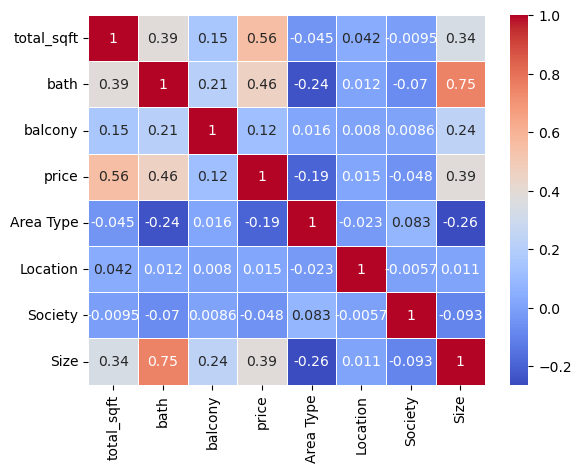

In [45]:
corr=data.corr()

sns.heatmap(corr,annot=True, cmap='coolwarm', linewidths=0.5)

<Axes: xlabel='total_sqft', ylabel='price'>

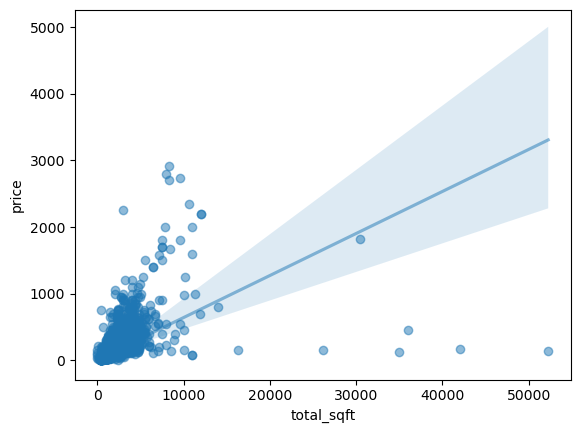

In [46]:

sns.regplot(x='total_sqft',y='price',data=data, scatter_kws={'alpha':0.5}, line_kws={'alpha':0.5})
#plt.xlim(0,15)
#plt.ylim(0,1500)
  # Set x-axis limits


(0.0, 15.0)

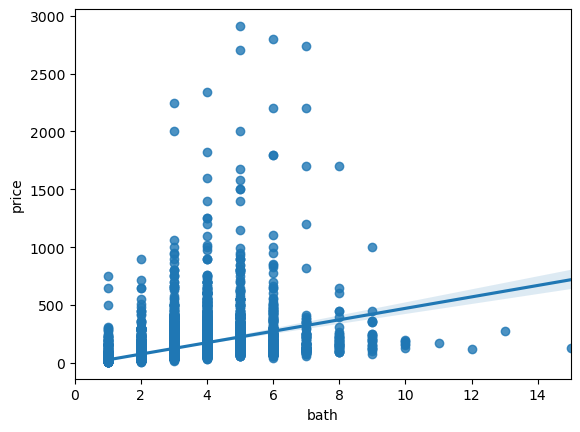

In [47]:
sns.regplot(data=data,x='bath',y='price')
plt.xlim(0,15)
#plt.ylim(0,1500)

# Removing Outliers

<Axes: >

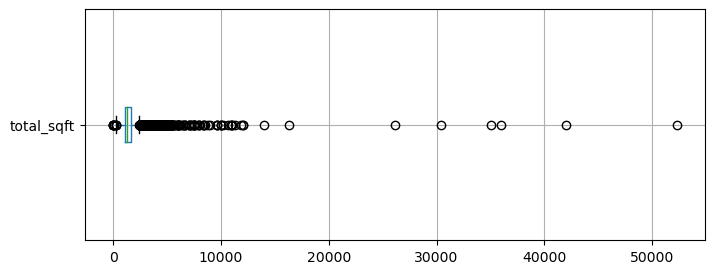

In [48]:
data.boxplot(['total_sqft'],figsize=(8,3),vert=False)


In [49]:
data.sort_values(by=['total_sqft'],ascending=False).head()

total_sqft  bath  balcony   price  Area Type  Location  Society  Size
1894        52272   2.0      1.0   140.0          1       856      777    13
5393        42000   8.0      3.0   175.0          2       376      777    25
5469        36000   4.0      2.0   450.0          2      1138     1709    14
674         35000   3.0      3.0   130.0          3      1222      599    12
12987       30400   4.0      2.0  1824.0          1       385      777    20

<Axes: >

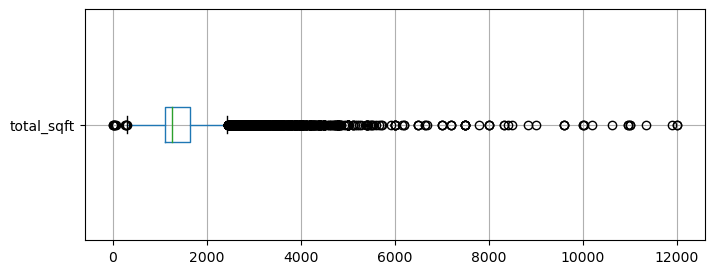

In [52]:
#outlier filter
outlier_filter=data['total_sqft'] < 12500
data=data[outlier_filter]
data.boxplot(['total_sqft'],figsize=(8,3),vert=False)

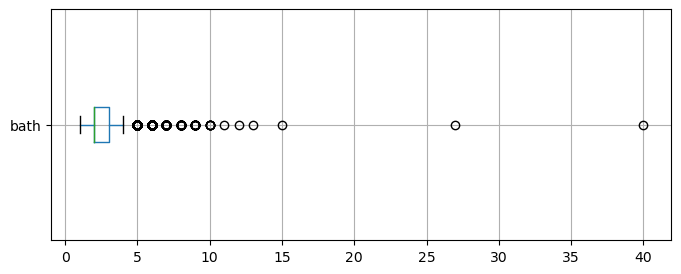

In [53]:
b=data.boxplot('bath',vert=False,figsize=(8,3))

In [54]:
outlier=data['bath']<12
data=data[outlier]

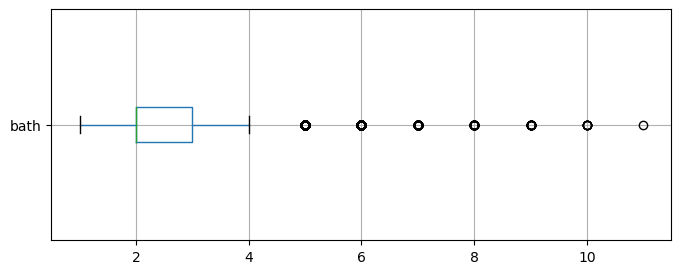

In [55]:
b=data.boxplot('bath',vert=False,figsize=(8,3))

# Splitting the data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
independent=['total_sqft','bath']
dependent=['price']

In [59]:
x=data[independent].values
y=data[dependent].values

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=49)

In [61]:
X_train.shape


(9940, 2)

In [62]:
Y_test.shape

(2485, 1)

# Feature scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
sc=MinMaxScaler()

In [65]:
sc.fit(X_train)

MinMaxScaler()

In [66]:
X_train

array([[1.095e+03, 2.000e+00],
       [1.063e+03, 2.000e+00],
       [1.260e+03, 2.000e+00],
       ...,
       [1.260e+03, 1.000e+00],
       [1.280e+03, 3.000e+00],
       [9.500e+02, 2.000e+00]])

In [67]:
X_train=sc.transform(X_train)

In [68]:
X_train

array([[0.0908712 , 0.1       ],
       [0.08820342, 0.1       ],
       [0.10462693, 0.1       ],
       ...,
       [0.10462693, 0.        ],
       [0.10629429, 0.2       ],
       [0.07878283, 0.1       ]])

In [69]:
X_train=pd.DataFrame(X_train,columns=['total_sqft', 'bath'])

In [70]:
data=X_train.describe().round(2)
data

total_sqft     bath
count     9940.00  9940.00
mean         0.12     0.16
std          0.07     0.11
min          0.00     0.00
25%          0.09     0.10
50%          0.10     0.10
75%          0.13     0.20
max          1.00     1.00

In [71]:
Y_train=sc.fit_transform(Y_train)

In [72]:
Y_train=pd.DataFrame(Y_train,columns=['price'])
Y_train.head()

price
0  0.011019
1  0.018309
2  0.012741
3  0.025826
4  0.030992

# Fitting a Model

In [73]:
# Creating a regression model to predict the aggregate rating of a restaurant based on available features
# Import necessary libraries for data splitting, regression, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

In [84]:
# Experimenting with different algorithms (e.g., linear regression, decision trees, random forest)
# And compare their performance by evaluating the model's performance using appropriate metrics

# Define a dictionary of regression models to experiment with
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    'Ada Boost':AdaBoostRegressor(n_estimators=50, base_estimator=DecisionTreeRegressor(),learning_rate=1),
    'xgboost ':XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree'),
    'KNN':KNeighborsRegressor(),
    'SVM': svm.SVR(C=2, kernel='linear')
}

# Iterate through each model, train, evaluate, and print results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    Y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(Y_test, Y_pred)
    
     # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(Y_test, Y_pred)

    #Accuracy
    a=model.score(X_train,Y_train)*100

    # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Accuracy:{a}")
    #print(f"Mean Squared Error: {mse}")
   #print(f"R-squared: {r2}")
    print("-"*20)
    
    

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: Linear Regression
Accuracy:54.492377810968605
--------------------
Model: Decision Tree
Accuracy:87.25831769085542
--------------------


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Model: Random Forest
Accuracy:83.51186734891986
--------------------


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:07:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model: Ada Boost
Accuracy:73.6482479839354
--------------------
Model: xgboost 
Accuracy:65.3065056316829
--------------------
Model: KNN
Accuracy:68.462924031091
--------------------


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVM
Accuracy:-133.1901158047005
--------------------


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [85]:
#checking
LR=LinearRegression()
DT=DecisionTreeRegressor()
RF=RandomForestRegressor()

LR.fit(X_train, Y_train)
DT.fit(X_train, Y_train)
RF.fit(X_train, Y_train)

LR_pred = LR.predict(X_train)
DT_pred =DT.predict(X_train)
RF_pred = RF.predict(X_train)

TestingDataResults=pd.DataFrame(data=X_train, columns=['total_sqft','bath'])
TestingDataResults['price']=Y_train
TestingDataResults["LR"]=LR_pred
TestingDataResults["DT"]=DT_pred
TestingDataResults["RF"]=RF_pred
TestingDataResults

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


total_sqft  bath     price        LR        DT        RF
0       0.090871   0.1  0.011019  0.016247  0.012728  0.012664
1       0.088203   0.1  0.018309  0.015038  0.011213  0.011206
2       0.104627   0.1  0.012741  0.022478  0.020991  0.020948
3       0.100959   0.1  0.025826  0.020816  0.023677  0.023580
4       0.148729   0.2  0.030992  0.046824  0.027032  0.028181
5       0.137974   0.2  0.033058  0.041953  0.033747  0.033896
6       0.100875   0.1  0.013361  0.020779  0.016399  0.016358
7       0.041017   0.0  0.005854 -0.010705  0.004304  0.004421
8       0.104627   0.1  0.015152  0.022478  0.020991  0.020948
9       0.132138   0.2  0.030303  0.039309  0.026171  0.026175
10      0.082951   0.1  0.017906  0.012659  0.014282  0.014138
11      0.097957   0.1  0.012741  0.019457  0.019362  0.019420
12      0.089621   0.1  0.010262  0.015680  0.014103  0.014137
13      0.123802   0.1  0.017769  0.031164  0.038662  0.037823
14      0.049604   0.2  0.018595  0.001922  0.026504  0.026573
15      0.333055   0.3  0.176309  0.134691  0.151653  0.153521
16      0.085452   0.1  0.014118  0.013792  0.020994  0.020544
17      0.074281   0.1  0.007621  0.008732  0.009966  0.011798
18      0.129971   0.2  0.032025  0.038327  0.032599  0.032622
19      0.091288   0.1  0.024105  0.016436  0.016334  0.016270
20      0.106711   0.1  0.012741  0.023422  0.018422  0.018390
21      0.070446   0.1  0.012741  0.006994  0.010880  0.010915
22      0.089204   0.1  0.012741  0.015492  0.012887  0.012891
23      0.099625   0.1  0.028237  0.020212  0.020346  0.020343
24      0.084202   0.1  0.017218  0.013226  0.011451  0.011369
25      0.093789   0.1  0.008481  0.017569  0.015258  0.015461
26      0.127303   0.2  0.028926  0.037119  0.029981  0.029806
27      0.136724   0.2  0.038912  0.041386  0.033988  0.034031
28      0.103210   0.1  0.013085  0.021836  0.013308  0.013319
29      0.271280   0.2  0.090220  0.102339  0.090220  0.090068
30      0.074614   0.2  0.014807  0.013251  0.024105  0.023864
31      0.074614   0.1  0.011019  0.008883  0.015850  0.015742
32      0.040017   0.0  0.002410 -0.011158  0.003185  0.003928
33      0.180325   0.3  0.029959  0.065506  0.029959  0.041311
34      0.199667   0.3  0.136708  0.074267  0.104893  0.104095
35      0.099625   0.4  0.100551  0.033318  0.055473  0.055458
36      0.112130   0.2  0.021694  0.030246  0.026570  0.026780
37      0.032930   0.0  0.001205 -0.014368  0.003912  0.003653
38      0.117966   0.2  0.018595  0.032889  0.022796  0.022760
39      0.082951   0.1  0.014291  0.012659  0.014282  0.014138
40      0.056273   0.0  0.024793 -0.003794  0.018595  0.017058
41      0.305961   0.3  0.123623  0.122418  0.090737  0.093552
42      0.107962   0.1  0.022383  0.023989  0.021249  0.021273
43      0.112130   0.1  0.032713  0.025877  0.024599  0.024209
44      0.096707   0.1  0.011191  0.018890  0.017373  0.017340
45      0.091288   0.1  0.010486  0.016436  0.016334  0.016270
46      0.097207   0.1  0.022383  0.019117  0.019542  0.019426
47      0.202168   0.3  0.059229  0.075400  0.059229  0.058307
48      0.086286   0.1  0.034780  0.014170  0.015290  0.015253
49      0.099625   0.4  0.030303  0.033318  0.055473  0.055458
50      0.127637   0.2  0.027893  0.037270  0.030992  0.031208
51      0.088203   0.1  0.008227  0.015038  0.011213  0.011206
52      0.086286   0.1  0.016185  0.014170  0.015290  0.015253
53      0.111296   0.1  0.023760  0.025499  0.019872  0.019818
54      0.181492   0.2  0.022052  0.061666  0.022052  0.036191
55      0.094039   0.1  0.016185  0.017682  0.012340  0.012332
56      0.099625   0.3  0.040289  0.028949  0.052273  0.051760
57      0.208003   0.2  0.043733  0.073675  0.070087  0.070953
58      0.104627   0.1  0.016185  0.022478  0.020991  0.020948
59      0.151313   0.2  0.026653  0.047995  0.031841  0.031434
60      0.320550   0.5  0.067837  0.137764  0.067837  0.082256
61      0.095623   0.1  0.009146  0.018399  0.017686  0.017740
62      0.124635   0.3  0.066116  0.0